In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn.utils import shuffle

In [ ]:
data = genfromtxt('advertising.csv', delimiter=',', skip_header=True)
X = data[:, :3]
X = (X-np.mean(X))/(np.max(X) - np.min(X))
y = data[:, 3:4]
data_size = len(X)

X_train = np.hstack((np.ones((data_size, 1)), X))

In [ ]:
# forward
def predict(X, theta):
    pred = X.T @ theta
    return pred

# compute gradient
def gradient(X, y, y_predict):
    dtheta = X @ (y_predict - y)
    return dtheta

# update weights
def update_weight(theta, dtheta, learing_rate):
    theta_new = theta - learing_rate * dtheta
    return theta_new

# compute loss
def compute_loss(y, y_predict):
    loss = (y_predict - y) ** 2
    return loss

In [ ]:
losses = []
learning_rate = 0.1
num_of_epochs = 7
theta = np.random.random((X_train.shape[1], 1))

for epoch in range(num_of_epochs): # Train n epochs
    X_train, y = shuffle(X_train, y)
    for i in range(data_size): # Train with each sample
        # get a sample
        xi = X_train[i].reshape(-1, 1)
        yi = y[i:i+1]
        
        # predict
        yi_predict = predict(xi, theta)
        
        # compute loss
        loss = compute_loss(yi, yi_predict)
        losses.append(loss[0][0])

        # compute gradient
        dtheta = gradient(xi, yi, yi_predict)
    
        # update weights
        theta = update_weight(theta, dtheta, learning_rate)

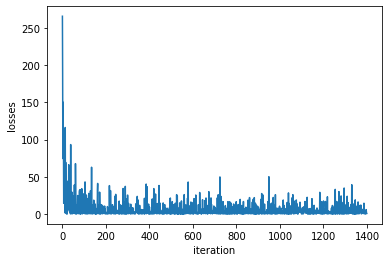

In [ ]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

In [ ]:
data = genfromtxt('advertising.csv', delimiter=',', skip_header=True)
X = data[:, :3]
y = data[:, 3:4]
data_size = len(X)

X_train = np.hstack((np.ones((data_size, 1)), X))

In [ ]:
# forward
def predict(X, theta):
    pred = sum([i * j for i, j in zip(X, theta)])
    return pred

# compute gradient
def gradient(X, y, y_predict):
    dtheta = [i * (y_predict - y) for i in X]
    return dtheta

# update weights
def update_weight(theta, dtheta, learing_rate):
    theta_new = [i - learing_rate * j for i, j in zip(theta, dtheta)]
    return theta_new

# compute loss
def compute_loss(y, y_predict):
    loss = (y_predict - y) ** 2
    return loss

In [ ]:
losses = []
learning_rate = 1e-5
num_of_epochs = 7
theta = np.random.random((X_train.shape[1]))

for epoch in range(num_of_epochs): # Train n epochs
    X_train, y = shuffle(X_train, y)
    for i in range(data_size): # Train with each sample
        # get a sample
        xi = X_train[i]
        yi = y[i][0]

        # predict
        yi_predict = predict(xi, theta)
        
        # compute loss
        loss = compute_loss(yi, yi_predict)
        losses.append(loss)

        # compute gradient
        dtheta = gradient(xi, yi, yi_predict)
    
        # update weights
        theta = update_weight(theta, dtheta, learning_rate)

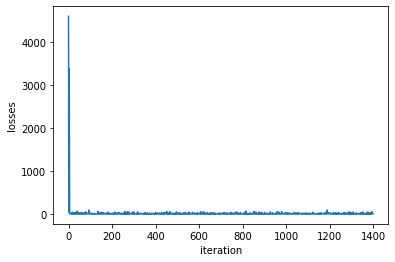

In [ ]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()